# BFCL v4 Analysis
This notebook loads the CSVs in `data/internal/_analysis_bfcl_v4` and produces summary tables and plots.


In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE = Path('berkeley-function-call-leaderboard/bfcl_eval/data/internal/_analysis_bfcl_v4')

# Style
plt.style.use('seaborn-v0_8')
sns.set_context('talk')

def read_csv(name):
    return pd.read_csv(BASE / name)


Matplotlib is building the font cache; this may take a moment.


In [10]:
by_source = read_csv('C:/Users/b-glanaro/gorilla/berkeley-function-call-leaderboard/bfcl_eval/data/internal/_analysis_bfcl_v4/by_source_file.csv')
by_task = read_csv('C:/Users/b-glanaro/gorilla/berkeley-function-call-leaderboard/bfcl_eval/data/internal/_analysis_bfcl_v4/by_task_type.csv')
tools_dist = read_csv('C:/Users/b-glanaro/gorilla/berkeley-function-call-leaderboard/bfcl_eval/data/internal/_analysis_bfcl_v4/candidate_tools_count_dist.csv')
decisions_dist = read_csv('C:/Users/b-glanaro/gorilla/berkeley-function-call-leaderboard/bfcl_eval/data/internal/_analysis_bfcl_v4/decisions_per_conversation_dist.csv')
top_candidates = read_csv('C:/Users/b-glanaro/gorilla/berkeley-function-call-leaderboard/bfcl_eval/data/internal/_analysis_bfcl_v4/top_candidate_tool_names.csv')
top_gt = read_csv('C:/Users/b-glanaro/gorilla/berkeley-function-call-leaderboard/bfcl_eval/data/internal/_analysis_bfcl_v4/top_ground_truth_tool_names.csv')

display(by_source.head())
display(by_task)


,source_file,rows,conversations,single_turn_rows,multi_turn_rows,avg_tools,p_multi_tool,p_empty_tools,p_missing_gt,p_empty_messages
0,multi_turn_long_context,1203,200,0,1203,6.025769,1.0,0.0,0.0,0.0
1,multi_turn_base,1142,200,0,1142,6.027145,1.0,0.0,0.0,0.0
2,multi_turn_miss_func,1140,200,0,1140,6.025439,1.0,0.0,0.0,0.0
3,multi_turn_miss_param,1140,200,0,1140,6.025439,1.0,0.0,0.0,0.0
4,live_multiple,1053,1053,1053,0,3.967711,1.0,0.0,0.0,0.0


,task_type,rows,conversations,avg_tools,p_multi_tool,p_empty_tools,p_missing_gt,p_empty_messages
0,multi_turn,4625,800,6.025946,1.000000,0.0,0.0,0.0
1,single_turn,3654,2756,2.275588,0.525178,0.0,0.0,0.0


## Rows by source file


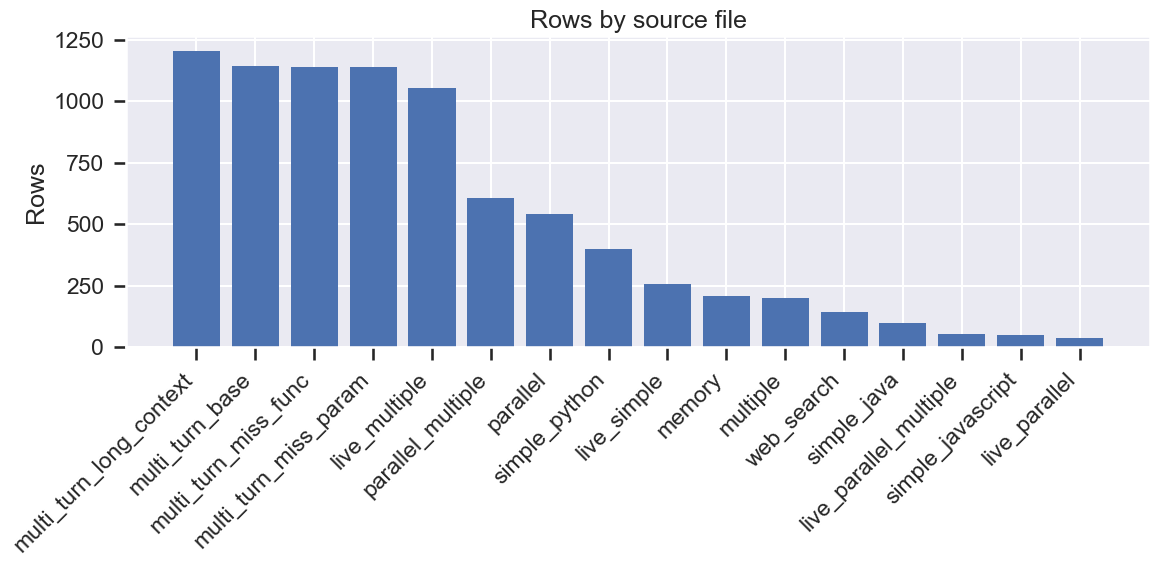

In [11]:
plt.figure(figsize=(12,6))
order = by_source.sort_values('rows', ascending=False)
plt.bar(order['source_file'], order['rows'])
plt.xticks(rotation=45, ha='right')
plt.title('Rows by source file')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()


## Task type split


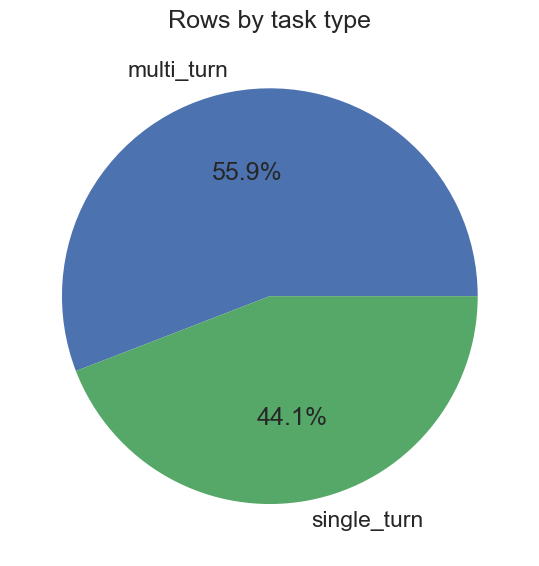

In [12]:
plt.figure(figsize=(6,6))
plt.pie(by_task['rows'], labels=by_task['task_type'], autopct='%1.1f%%')
plt.title('Rows by task type')
plt.tight_layout()
plt.show()


## Candidate tools per row


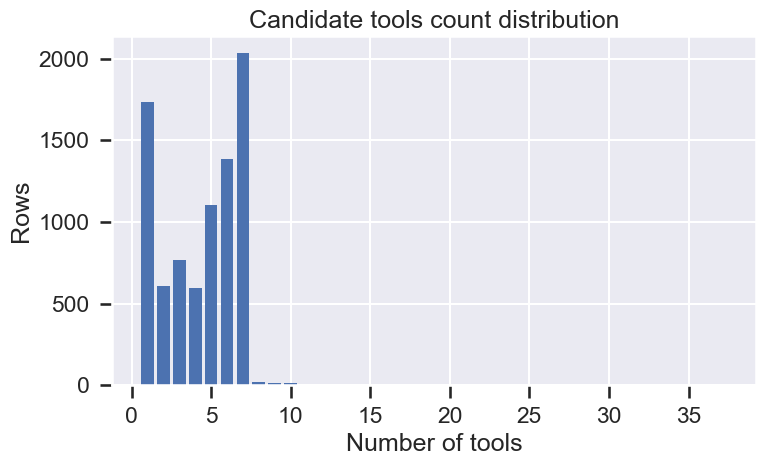

In [13]:
plt.figure(figsize=(8,5))
plt.bar(tools_dist['n_tools'], tools_dist['n_rows'])
plt.title('Candidate tools count distribution')
plt.xlabel('Number of tools')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()


## Decisions per conversation


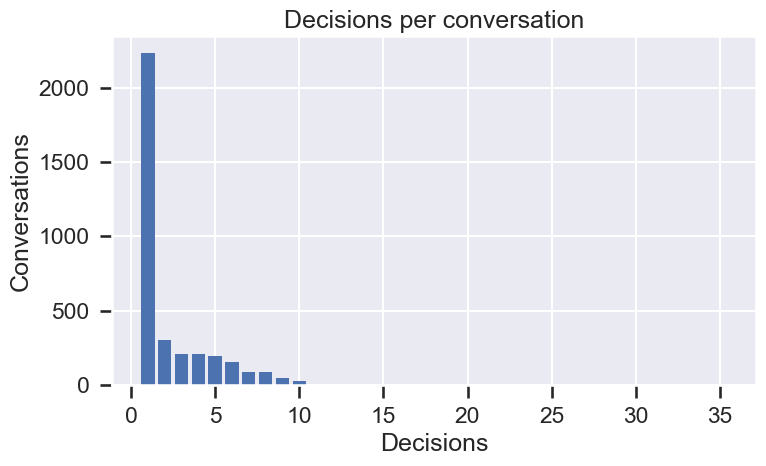

In [14]:
plt.figure(figsize=(8,5))
plt.bar(decisions_dist['n_decisions'], decisions_dist['n_conversations'])
plt.title('Decisions per conversation')
plt.xlabel('Decisions')
plt.ylabel('Conversations')
plt.tight_layout()
plt.show()


## Top candidate tools


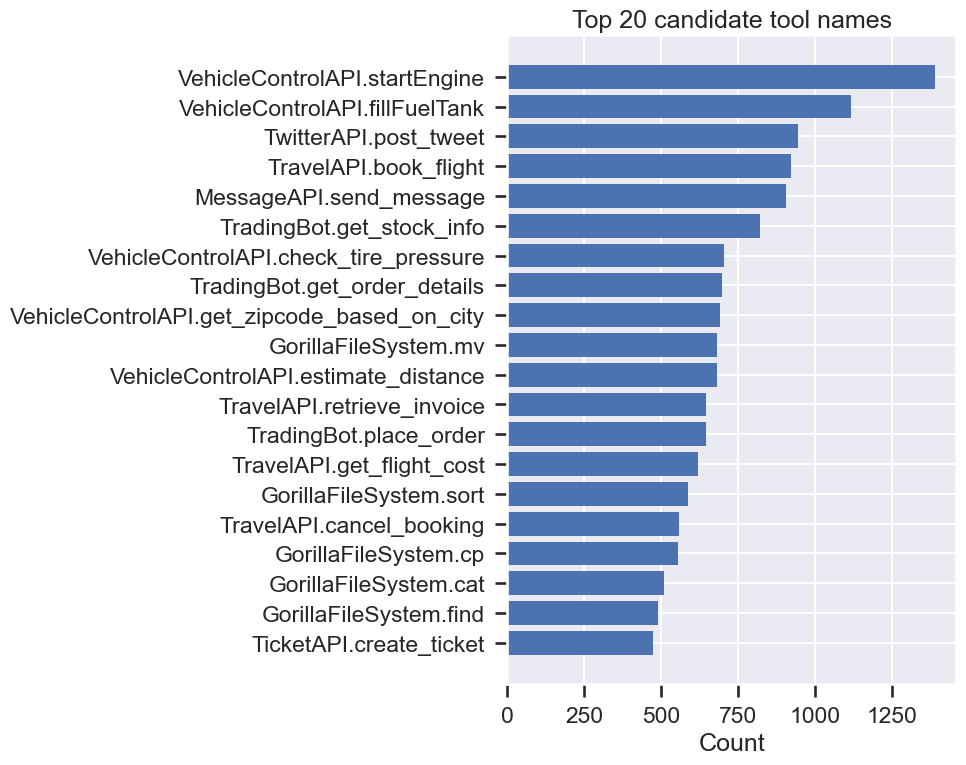

In [15]:
top_n = 20
top_candidates_n = top_candidates.head(top_n).sort_values('count')
plt.figure(figsize=(10,8))
plt.barh(top_candidates_n['tool_name'], top_candidates_n['count'])
plt.title(f'Top {top_n} candidate tool names')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


## Top ground-truth tools


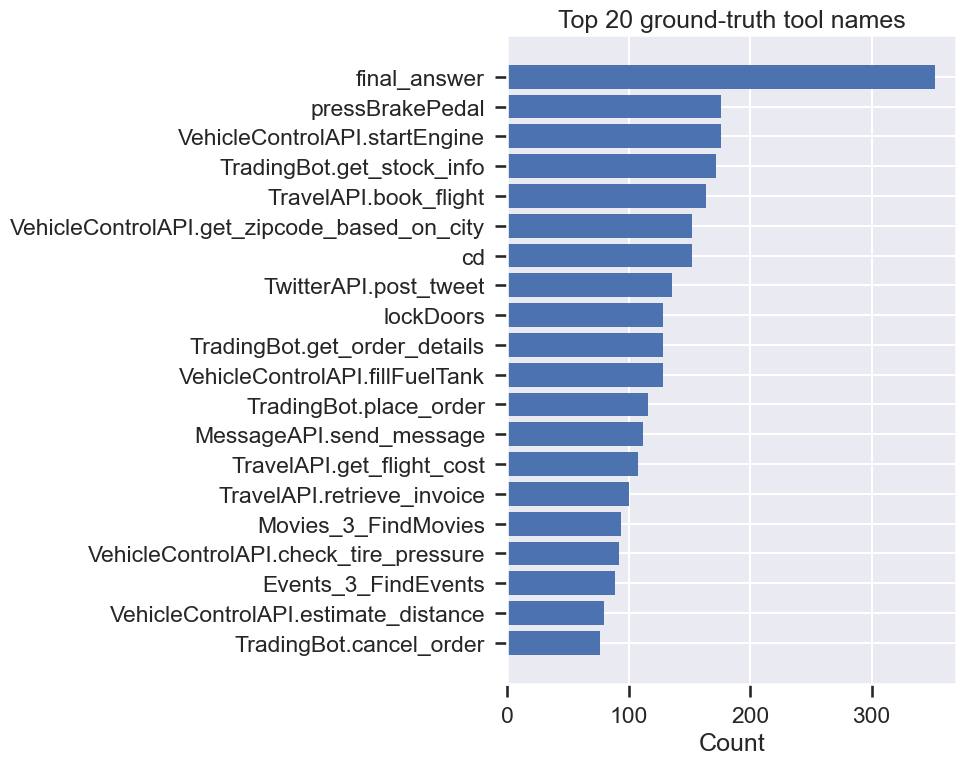

In [16]:
top_n = 20
top_gt_n = top_gt.head(top_n).sort_values('count')
plt.figure(figsize=(10,8))
plt.barh(top_gt_n['gt_tool_name'], top_gt_n['count'])
plt.title(f'Top {top_n} ground-truth tool names')
plt.xlabel('Count')
plt.tight_layout()
plt.show()
